<a href="https://colab.research.google.com/github/nk755799/IDS/blob/main/HW6/HW6Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project6 (HW6)    
Naresh Kalluri (10755799)   
Github repository: https://github.com/nk755799/IDS/tree/main/HW6**

In [ ]:
#importing all libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
import seaborn as sns

Imported all the libraries which i'm going to this project

In [ ]:
# importing dataset
adultDF= pd.read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW4/adult_training.csv")

Imported the dataset from the Professor Github link

Getting the First Five rows from the dataset

In [ ]:
# We will use Income as the target class in this exercise
adultDF.head()

,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K
1,38,Private,9,Divorced,Handlers-cleaners,Male,0,0,<=50K
2,49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K
3,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K
4,31,Private,14,Never-married,Prof-specialty,Female,14084,0,>50K


#**Training Data Preparation for Classification**

For simplicity, only two predictors and the target are retained, as follows:
Marital status: a categorical predictor with classes married, divorced, never‐married, separated, and widowed.
Cap_gains_losses: a numerical predictor, equal to capital gains + |capital losses|.
Income: a categorical target variable with two classes >50k and ≤50k

In [ ]:
# Creating a new predictor
adultDF['capital-gains-losses'] = adultDF['capital-gain'] + abs(adultDF['capital-loss'])


# Creating a new dataframe for the classification task with only three columns: two predictors and a target
new_adultDF = adultDF.filter(['marital-status','capital-gains-losses','income'], axis=1)

new_adultDF.head(10)


,marital-status,capital-gains-losses,income
0,Married-civ-spouse,0,<=50K
1,Divorced,0,<=50K
2,Married-spouse-absent,0,<=50K
3,Married-civ-spouse,0,>50K
4,Never-married,14084,>50K
5,Married-civ-spouse,0,>50K
6,Married-civ-spouse,0,<=50K
7,Married-civ-spouse,2042,<=50K
8,Married-civ-spouse,0,>50K
9,Divorced,0,<=50K


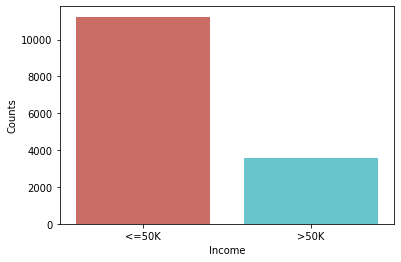

In [ ]:
# Examining target class distrbutions

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='income', data=new_adultDF, palette = 'hls')
plt.xlabel('Income')
plt.ylabel('Counts')
plt.show()


In [ ]:
# We now need to encode the categoric columns

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# save the encoded dataframe here
encoded_adultDF = pd.DataFrame()

# Encode  only the categoric or boolean attributes (if any)
for i in range(0, new_adultDF.shape[1]):
    if new_adultDF.dtypes[i]=='object' or new_adultDF.dtypes[i]=='bool':
        encoded_adultDF[new_adultDF.columns[i]] = le.fit_transform(new_adultDF[new_adultDF.columns[i]])
    else:
        encoded_adultDF[new_adultDF.columns[i]] = new_adultDF[new_adultDF.columns[i]]
        
encoded_adultDF.head(10)

,marital-status,capital-gains-losses,income
0,2,0,0
1,0,0,0
2,3,0,0
3,2,0,1
4,4,14084,1
5,2,0,1
6,2,0,0
7,2,2042,0
8,2,0,1
9,0,0,0


# **Train_Test_Split**

In [ ]:
from sklearn.model_selection import train_test_split

# Prepare X and y
X = encoded_adultDF.filter(['marital-status','capital-gains-losses'], axis=1)
y = encoded_adultDF['income']


# Let's do an 80-20 split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=42, shuffle=True, train_size=0.80, stratify=y)

print("Training size:", X_train.shape)
print("Test size:", X_test.shape)

Training size: (11837, 2)
Test size: (2960, 2)


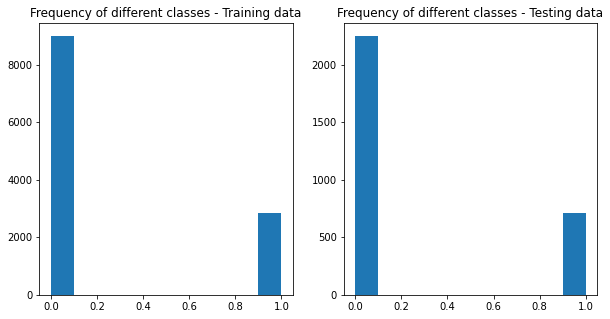

In [ ]:
# Find out class distributions in training and test datasets.

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(y_train);
plt.title('Frequency of different classes - Training data');

plt.subplot(1,2,2)
plt.hist(y_test);
plt.title('Frequency of different classes - Testing data');

# **Training, Plotting, and Printing Decision Trees**

In [ ]:
cn = ['low_income', 'hi_income']

In [ ]:
def makeDTModel(criterion, X_train, y_train):
 return DecisionTreeClassifier(criterion=criterion,max_depth=3,max_leaf_nodes=3,random_state = 120).fit(X_train,y_train)

Creating a new function called makeDTModel

In [ ]:
# Taking max_depth=2 and max_leaf_nodes=3
cart_classifier1 = makeDTModel("gini", X_train, y_train)
c5_classifier1 = makeDTModel("entropy", X_train, y_train)

In [ ]:
# display text and graphic representation of a tree classifier
def displayTree(classifier, X):
  plt.figure(figsize=(10, 8), dpi=80)
  tree.plot_tree(classifier, feature_names=X.columns.values.tolist(), class_names=cn,filled = True)

#**Priting the Decision tree**

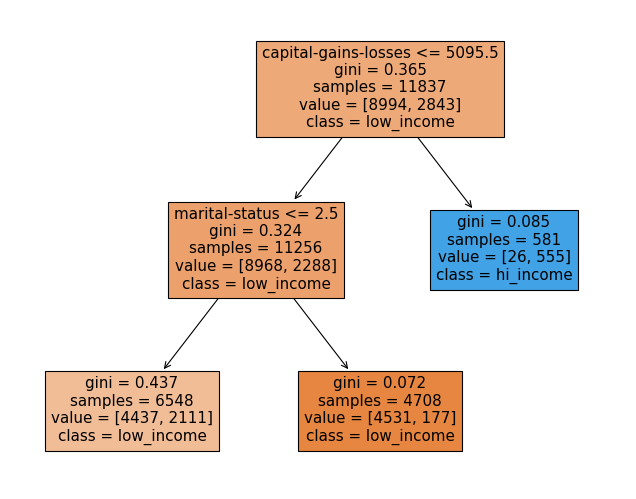

In [ ]:
displayTree(cart_classifier1, X)

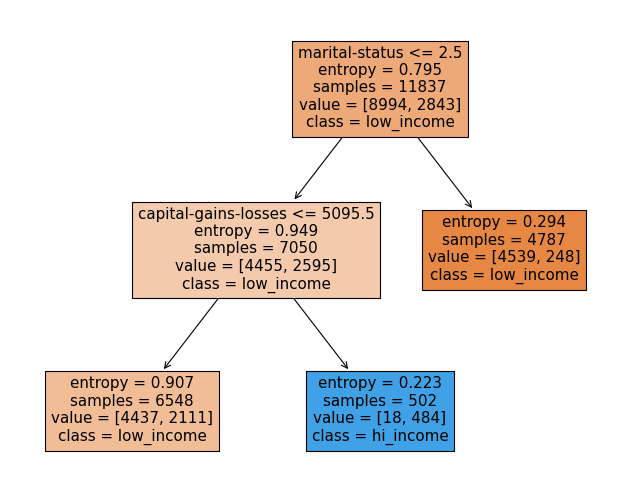

In [ ]:
displayTree(c5_classifier1, X)

In [ ]:
# display text and heatmap of a confusion matrix
def displayCM(classifier, X_train, y_train, X_test, y_test):
  predictions = classifier.predict(X_test)
  cm = confusion_matrix(y_true=y_test, y_pred = predictions)
  print(cm)
  
  sns.heatmap(cm, annot=True, linewidths=.5, square = True, cmap = 'Oranges_r', fmt='0.4g');
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')
  plt.title("Cart classifier1")

[[2238   11]
 [ 583  128]]


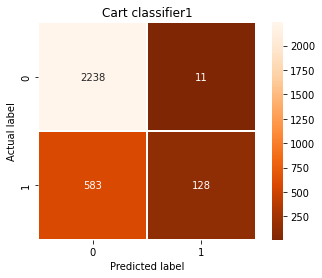

In [ ]:
displayCM(cart_classifier1, X_train, y_train, X_test, y_test)

[[2243    6]
 [ 597  114]]


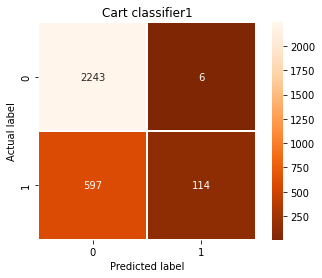

In [ ]:
displayCM(c5_classifier1, X_train, y_train, X_test, y_test)

In [ ]:
# Record CART's classification accuracy on tarining and test datasets
score1 = round(cart_classifier1.score(X_train, y_train), 2) # training score
score2 = round(cart_classifier1.score(X_test, y_test), 2)   # testing score

print ("CART Training and Testing scores: %.2f, %.2f" %  (score1, score2))


# Record C5's classification accuracy on tarining and test datasets
score3 = round(c5_classifier1.score(X_train, y_train), 2) # training score
score4 = round(c5_classifier1.score(X_test, y_test), 2)   # testing score

print ("C5.0 Training and Testing scores: %.2f, %.2f" %  (score3, score4))

CART Training and Testing scores: 0.80, 0.80
C5.0 Training and Testing scores: 0.80, 0.80


In [ ]:
# create and display plots of side-by-side model comparisons
def compareModels(cart_classifier, c5_classifier):
  labels = ['CART', 'C5.0']

  training_scores = [score1, score3]
  testing_scores =  [score2, score4]

  x = np.arange(2)  # the label locations
  width = 0.35  # the width of the bars

  fig, ax = plt.subplots()
  rects1 = ax.bar(x - width/2, training_scores, width, label='Training', color='navy')
  rects2 = ax.bar(x + width/2, testing_scores, width, label='Testing', color='orange')

  # Add some text for labels, title and custom x-axis tick labels, etc.
  ax.set_ylabel('Model Accuracy')
  ax.set_xticks(x)
  ax.set_ylim(0,1)
  ax.set_xticklabels(labels)
  ax.legend(bbox_to_anchor = (1.3, 1.0), loc='upper right')

  plt.title('Model Comparisons')
  plt.show()

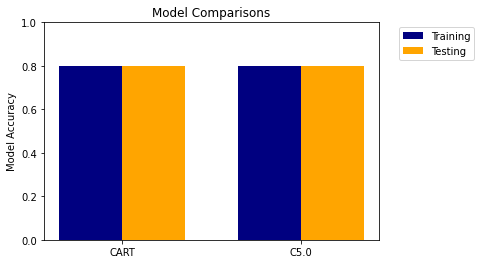

In [ ]:
# Accuracy Scores and plots for side-by-side model comparisons of cart_classifier1 and c5_classifier1
compareModels(cart_classifier1, c5_classifier1)

In [ ]:
def makeDTModel(criterion, X_train, y_train):
 return DecisionTreeClassifier(criterion=criterion,max_depth=4,max_leaf_nodes=4,random_state = 120).fit(X_train,y_train)

In [ ]:
 # Taking max_depth=2 and max_leaf_nodes=3
cart_classifier2 = makeDTModel("gini", X_train, y_train)
c5_classifier2 = makeDTModel("entropy", X_train, y_train)

In [ ]:

# display text and graphic representation of a tree classifier
def displayTree(classifier, X):
  plt.figure(figsize=(10, 8), dpi=80)
  tree.plot_tree(classifier, feature_names=X.columns.values.tolist(), class_names=cn,filled = True)

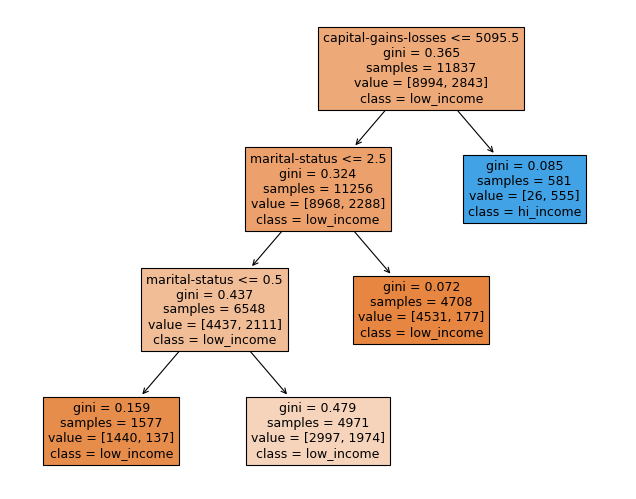

In [ ]:
displayTree(cart_classifier2, X)

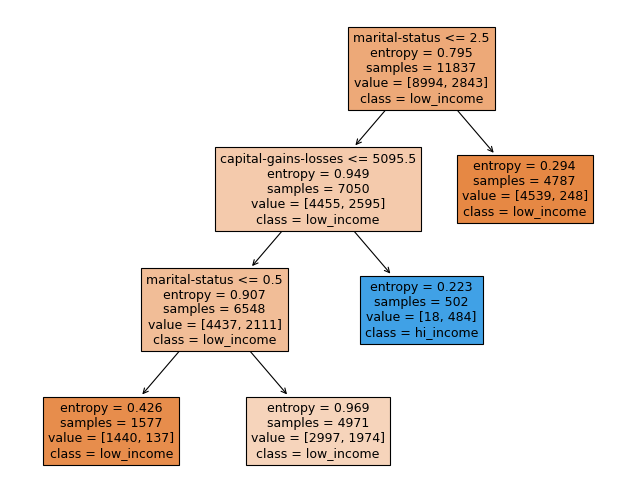

In [ ]:
displayTree(c5_classifier2, X)

In [ ]:
# display text and heatmap of a confusion matrix
def displayCM(classifier, X_train, y_train, X_test, y_test):
  predictions = classifier.predict(X_test)
  cm = confusion_matrix(y_true=y_test, y_pred = predictions)
  print(cm)
  
  sns.heatmap(cm, annot=True, linewidths=.5, square = True, cmap = 'Oranges_r', fmt='0.4g');
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')
  plt.title("Cart classifier1")

[[2238   11]
 [ 583  128]]


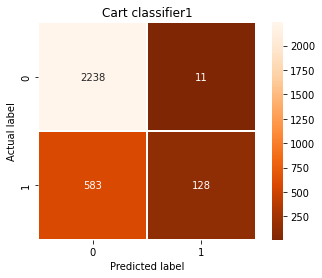

In [ ]:
displayCM(cart_classifier2, X_train, y_train, X_test, y_test)


[[2243    6]
 [ 597  114]]


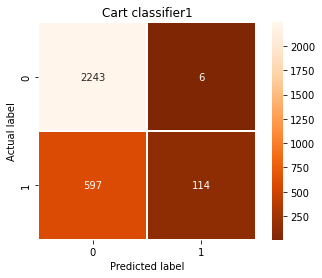

In [ ]:
displayCM(c5_classifier2, X_train, y_train, X_test, y_test)


In [ ]:
# Record CART's classification accuracy on tarining and test datasets
score1 = round(cart_classifier2.score(X_train, y_train), 2) # training score
score2 = round(cart_classifier2.score(X_test, y_test), 2)   # testing score
print ("CART Training and Testing scores: %.2f, %.2f" %  (score1, score2))
# Record C5's classification accuracy on tarining and test datasets
score3 = round(c5_classifier2.score(X_train, y_train), 2) # training score
score4 = round(c5_classifier2.score(X_test, y_test), 2)   # testing score
print ("C5.0 Training and Testing scores: %.2f, %.2f" %  (score3, score4))

CART Training and Testing scores: 0.80, 0.80
C5.0 Training and Testing scores: 0.80, 0.80


In [ ]:
# create and display plots of side-by-side model comparisons
def compareModels(cart_classifier, c5_classifier):
  labels = ['CART', 'C5.0']

  training_scores = [score1, score3]
  testing_scores =  [score2, score4]

  x = np.arange(2)  # the label locations
  width = 0.35  # the width of the bars

  fig, ax = plt.subplots()
  rects1 = ax.bar(x - width/2, training_scores, width, label='Training', color='navy')
  rects2 = ax.bar(x + width/2, testing_scores, width, label='Testing', color='orange')

  # Add some text for labels, title and custom x-axis tick labels, etc.
  ax.set_ylabel('Model Accuracy')
  ax.set_xticks(x)
  ax.set_ylim(0,1)
  ax.set_xticklabels(labels)
  ax.legend(bbox_to_anchor = (1.3, 1.0), loc='upper right')

  plt.title('Model Comparisons')
  plt.show()

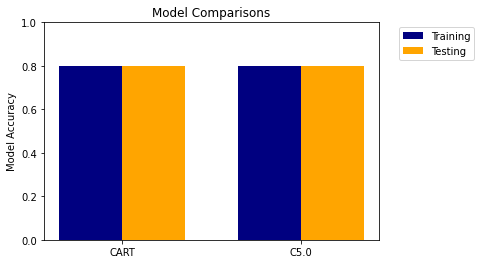

In [ ]:
 # Accuracy Scores and plots for side-by-side model comparisons of cart_classifier2 and c5_classifier2
compareModels(cart_classifier2, c5_classifier2)

max_depth=5 and max_leaf_node=5

In [ ]:
def makeDTModel(criterion, X_train, y_train):
 return DecisionTreeClassifier(criterion=criterion,max_depth=5,max_leaf_nodes=5,random_state = 120).fit(X_train,y_train)

In [ ]:
 # Taking max_depth=5 and max_leaf_nodes=5
cart_classifier3 = makeDTModel("gini", X_train, y_train)
c5_classifier3 = makeDTModel("entropy", X_train, y_train)

In [ ]:
# display text and graphic representation of a tree classifier
def displayTree(classifier, X):
  plt.figure(figsize=(10, 8), dpi=80)
  tree.plot_tree(classifier, feature_names=X.columns.values.tolist(), class_names=cn,filled = True)

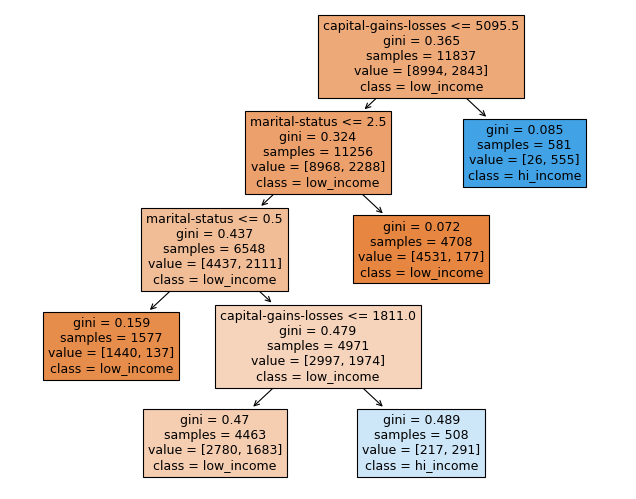

In [ ]:
displayTree(cart_classifier3, X)

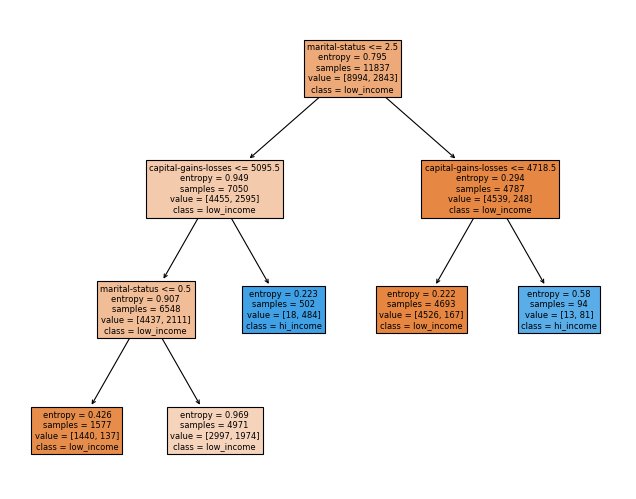

In [ ]:
displayTree(c5_classifier3, X)

In [ ]:
# display text and heatmap of a confusion matrix
def displayCM(classifier, X_train, y_train, X_test, y_test):
  predictions = classifier.predict(X_test)
  cm = confusion_matrix(y_true=y_test, y_pred = predictions)
  print(cm)
  
  sns.heatmap(cm, annot=True, linewidths=.5, square = True, cmap = 'Oranges_r', fmt='0.4g');
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')
  plt.title("Cart classifier1")

[[2187   62]
 [ 511  200]]


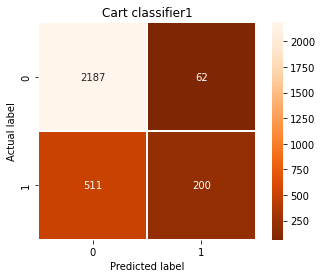

In [ ]:
displayCM(cart_classifier3, X_train, y_train, X_test, y_test)

[[2235   14]
 [ 583  128]]


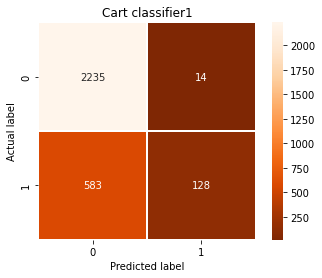

In [ ]:
displayCM(c5_classifier3, X_train, y_train, X_test, y_test)


In [ ]:
# Record CART's classification accuracy on tarining and test datasets
score1 = round(cart_classifier3.score(X_train, y_train), 2) # training score
score2 = round(cart_classifier3.score(X_test, y_test), 2)   # testing score
print ("CART Training and Testing scores: %.2f, %.2f" %  (score1, score2))
# Record C5's classification accuracy on tarining and test datasets
score3 = round(c5_classifier3.score(X_train, y_train), 2) # training score
score4 = round(c5_classifier3.score(X_test, y_test), 2)   # testing score
print ("C5.0 Training and Testing scores: %.2f, %.2f" %  (score3, score4))


CART Training and Testing scores: 0.81, 0.81
C5.0 Training and Testing scores: 0.80, 0.80


In [ ]:
# create and display plots of side-by-side model comparisons
def compareModels(cart_classifier, c5_classifier):
  labels = ['CART', 'C5.0']

  training_scores = [score1, score3]
  testing_scores =  [score2, score4]

  x = np.arange(2)  # the label locations
  width = 0.35  # the width of the bars

  fig, ax = plt.subplots()
  rects1 = ax.bar(x - width/2, training_scores, width, label='Training', color='navy')
  rects2 = ax.bar(x + width/2, testing_scores, width, label='Testing', color='orange')

  # Add some text for labels, title and custom x-axis tick labels, etc.
  ax.set_ylabel('Model Accuracy')
  ax.set_xticks(x)
  ax.set_ylim(0,1)
  ax.set_xticklabels(labels)
  ax.legend(bbox_to_anchor = (1.3, 1.0), loc='upper right')

  plt.title('Model Comparisons')
  plt.show()

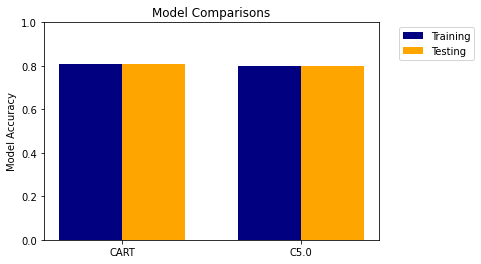

In [ ]:

# Accuracy Scores and plots for side-by-side model comparisons of cart_classifier3 and c5_classifier3
compareModels(cart_classifier3, c5_classifier3)

max_depth=None and max_leaf_node=None

In [ ]:
def makeDTModel(criterion, X_train, y_train):
 return DecisionTreeClassifier(criterion=criterion,random_state = 120).fit(X_train,y_train)

In [ ]:
 # Taking max_depth=5 and max_leaf_nodes=5
cart_classifier4 = makeDTModel("gini", X_train, y_train)
c5_classifier4 = makeDTModel("entropy", X_train, y_train)

In [ ]:
# display text and graphic representation of a tree classifier
def displayTree(classifier, X):
  plt.figure(figsize=(10, 8), dpi=80)
  tree.plot_tree(classifier, feature_names=X.columns.values.tolist(), class_names=cn,filled = True)

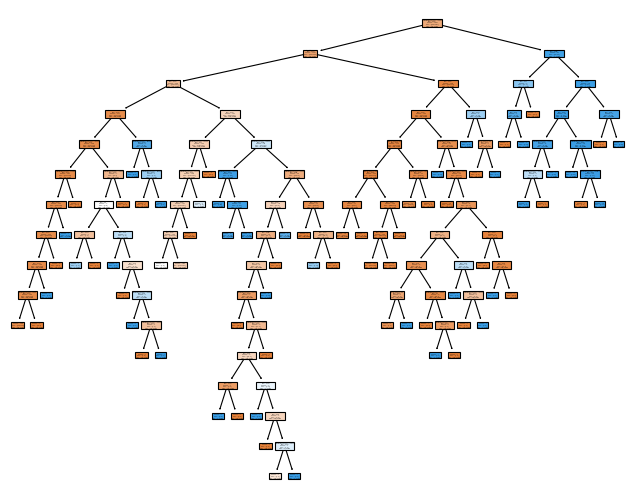

In [ ]:
displayTree(cart_classifier4, X)


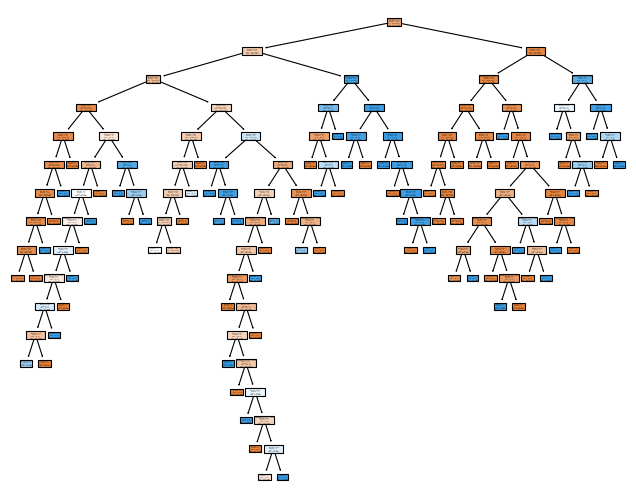

In [ ]:
displayTree(c5_classifier4, X)


In [ ]:
# display text and heatmap of a confusion matrix
def displayCM(classifier, X_train, y_train, X_test, y_test):
  predictions = classifier.predict(X_test)
  cm = confusion_matrix(y_true=y_test, y_pred = predictions)
  print(cm)
  
  sns.heatmap(cm, annot=True, linewidths=.5, square = True, cmap = 'Oranges_r', fmt='0.4g');
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')
  plt.title("Cart classifier1")

[[2238   11]
 [ 502  209]]


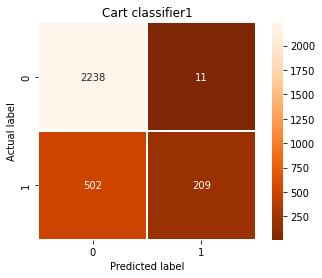

In [ ]:
displayCM(cart_classifier4, X_train, y_train, X_test, y_test)


[[2237   12]
 [ 502  209]]


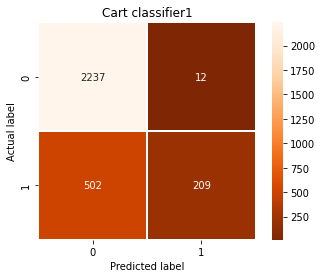

In [ ]:
displayCM(c5_classifier4, X_train, y_train, X_test, y_test)


In [ ]:
# Record CART's classification accuracy on tarining and test datasets
score1 = round(cart_classifier4.score(X_train, y_train), 2) # training score
score2 = round(cart_classifier4.score(X_test, y_test), 2)   # testing score
print ("CART Training and Testing scores: %.2f, %.2f" %  (score1, score2))
# Record C5's classification accuracy on tarining and test datasets
score3 = round(c5_classifier4.score(X_train, y_train), 2) # training score
score4 = round(c5_classifier4.score(X_test, y_test), 2)   # testing score
print ("C5.0 Training and Testing scores: %.2f, %.2f" %  (score3, score4))

CART Training and Testing scores: 0.83, 0.83
C5.0 Training and Testing scores: 0.83, 0.83


In [ ]:
# create and display plots of side-by-side model comparisons
def compareModels(cart_classifier, c5_classifier):
  labels = ['CART', 'C5.0']

  training_scores = [score1, score3]
  testing_scores =  [score2, score4]

  x = np.arange(2)  # the label locations
  width = 0.35  # the width of the bars

  fig, ax = plt.subplots()
  rects1 = ax.bar(x - width/2, training_scores, width, label='Training', color='navy')
  rects2 = ax.bar(x + width/2, testing_scores, width, label='Testing', color='orange')

  # Add some text for labels, title and custom x-axis tick labels, etc.
  ax.set_ylabel('Model Accuracy')
  ax.set_xticks(x)
  ax.set_ylim(0,1)
  ax.set_xticklabels(labels)
  ax.legend(bbox_to_anchor = (1.3, 1.0), loc='upper right')

  plt.title('Model Comparisons')
  plt.show()

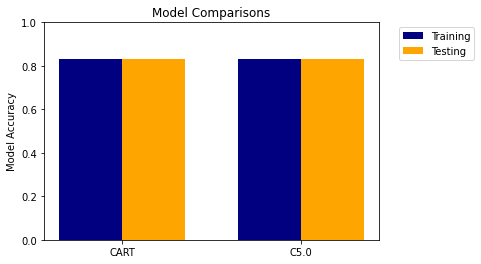

In [ ]:
 # Accuracy Scores and plots for side-by-side model comparisons of cart_classifier4 and c5_classifier4
compareModels(cart_classifier4, c5_classifier4)

**Summarizing of my Findings:**

1.
